In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head()

Размеры датасета (6000, 9)


was_married  children        salary  sex   age     profession  \
id                                                                  
0             1       4.0  4.420530e+07    1  82.0       Engineer   
1             1       2.0  1.737490e+08    1  32.0         Doctor   
2             1       6.0  2.489055e+08    1  14.0  Entertainment   
3             0       1.0  1.268718e+08    0  10.0         Lawyer   
4             1       9.0  8.596042e+07    1  99.0         Artist   

       home_cost  drive_info  happyness  
id                                       
0   1.003674e+07         NaN   0.727499  
1   1.014051e+07         0.0   0.383234  
2   1.043318e+07         NaN   0.432142  
3   1.004299e+07         NaN   0.377987  
4   1.021908e+07         NaN   0.657579

In [3]:
data.to_csv('HW_3.csv', index = False)

In [4]:
data['drive_info'].unique()

array([nan,  0.,  1.])

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

### задание 1 и 2

In [5]:
# можно посмотреть таким образом и отобрать все int и float в числовые
# а остальные признаки в категориальные, и при этом не стоит забывать еще и про будевые значения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   profession   6000 non-null   object 
 6   home_cost    6000 non-null   float64
 7   drive_info   3230 non-null   float64
 8   happyness    6000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 468.8+ KB


In [6]:
# но зачем, когда мы можем все автоматизировать, чтобы машина все сделала за нас:)
# Для этого напишем функцию
def advanced_categorize_columns(df):
    """
    Функция классифицирует столбцы датафрейма как числовые или категориальные.
    Столбцы, которые состоят только из 1, 0 (или 1.0, 0.0).

    :param df: датафрейм pandas
    :return: (numeric_columns, categorical_columns) - кортеж из двух списков
    """
    numeric_columns = []
    categorical_columns = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Если столбец состоит только из 1, 0 (или 1.0, 0.0) и NaN, считаем его категориальным
            unique_values = df[col].dropna().unique()
            if set(unique_values) <= {0, 1}:
                categorical_columns.append(col)
            else:
                numeric_columns.append(col)
        else:
            categorical_columns.append(col)
    
    return numeric_columns, categorical_columns

# Применение функции к датафрейму
numeric_columns, categorical_columns = advanced_categorize_columns(data)

print("Числовые столбцы:", numeric_columns)
print("Категориальные столбцы:", categorical_columns)

Числовые столбцы: ['children', 'salary', 'age', 'home_cost', 'happyness']
Категориальные столбцы: ['was_married', 'sex', 'profession', 'drive_info']


### задание 3

Для выполнения этого задания построим графики Q-Q(квантиль-квантиль)

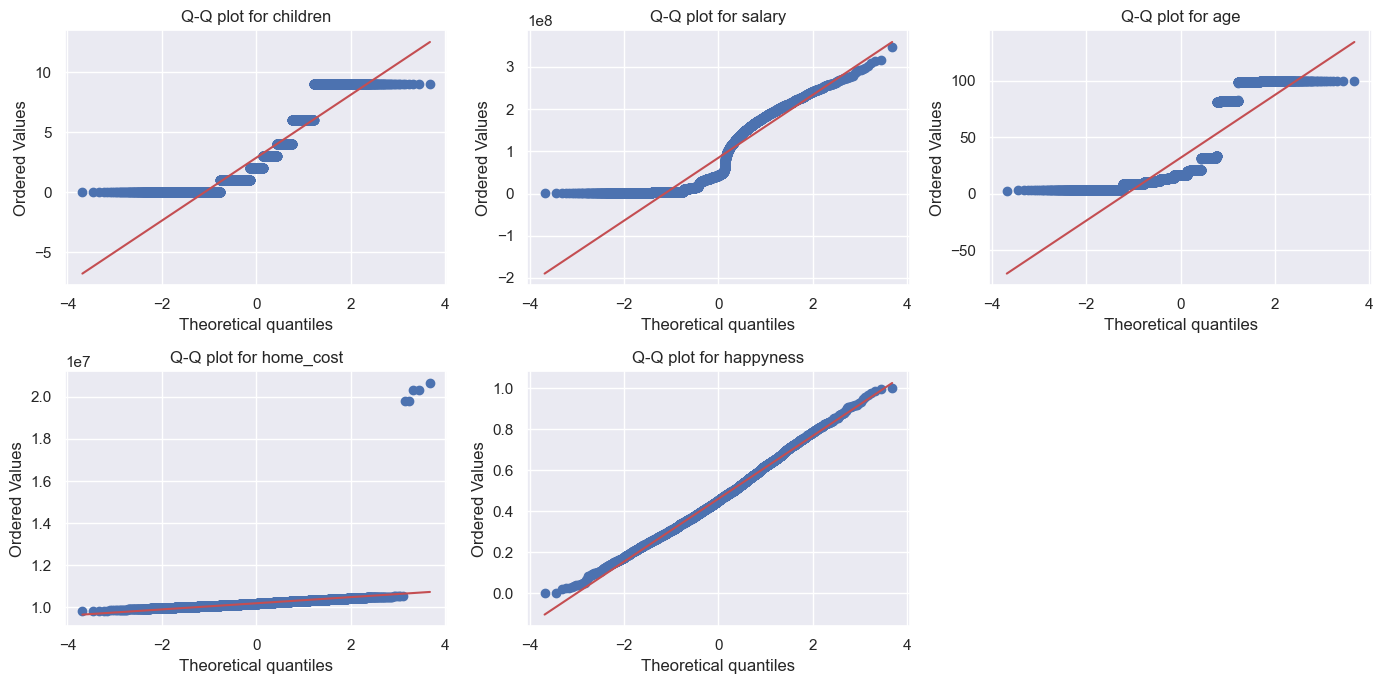

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Функция для построения графиков Q-Q
def qq_plots(df, columns):
    plt.figure(figsize=(14, 7))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q plot for {col}')
    plt.tight_layout()
    plt.show()

# Построение графиков Q-Q для числовых признаков
qq_plots(data, numeric_columns)

На графиках Q-Q видно, что ни один из числовых признаков ('children', 'salary', 'age', 'home_cost', 'happyness') не следует нормальному распределению, т.к. точки не располагаются вдоль прямой линии.

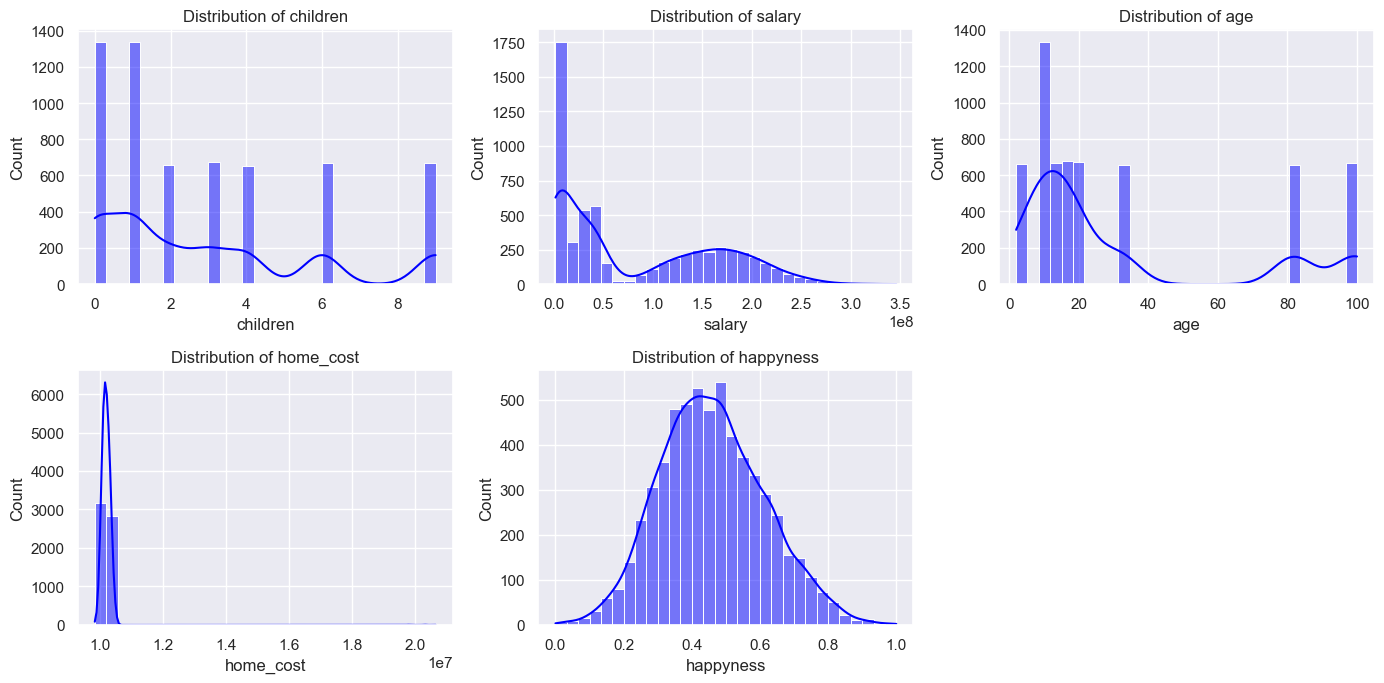

In [8]:
# но мы можем посмотреть и в более привычном варианте
import seaborn as sns

# Функция для построения гистограмм и графиков плотности распределения
def distribution_plots(df, columns):
    plt.figure(figsize=(14, 7))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True, bins=30, color='blue')  # Построение гистограммы и графика плотности
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Построение графиков распределения для числовых признаков
distribution_plots(data, numeric_columns)

На графиках выше представлены гистограммы и графики плотности распределения для каждого числового признака. Из графиков видно, что:

- `children` имеет положительную асимметрию и не следует нормальному распределению.
- `salary` также имеет положительную асимметрию и не следует нормальному распределению.
- `age` имеет распределение, близкое к нормальному, но с некоторой положительной асимметрией.
- `home_cost` показывает небольшую положительную асимметрию.
- `happyness` имеет близкое к нормальному распределение.

Исходя из этих визуализаций, можно сказать, что признак `happyness` имеет распределение, наиболее близкое к нормальному.

Также, чтобы полностью убедиться в нашей право проведем еще тест на нормальное распределение при помощи p-value

In [9]:
# Импорт необходимых библиотек
from scipy.stats import normaltest

# Проверка на нормальное распределение числовых признаков
numerical_columns = ['children', 'salary', 'age', 'home_cost', 'happyness']
normaltest_results = {}

for column in numerical_columns:
    stat, p = normaltest(data[column])
    normaltest_results[column] = p

# Вывод результатов теста на нормальность
normaltest_results

{'children': 8.804914170424406e-147,
 'salary': 0.0,
 'age': 2.6470421618451086e-208,
 'home_cost': 0.0,
 'happyness': 1.2429311718490405e-13}

Результаты теста на нормальное распределение показывают, что p-value для всех числовых признаков существенно меньше 0.05, что говорит о том, что ни один из признаков не имеет нормального распределения.

### задание 4

Для начала проверим на пропуски, т.к. если фича состоит почти вся из пропусков, то вероятнее всего она будет не информативной

In [10]:
def missing_values(df):
    """
    Функция для вычисления процентного соотношения пропусков в каждом столбце датафрейма.

    :param df: исходный датафрейм pandas
    :return: новый датафрейм с двумя столбцами: 'Column' и 'Missing Percentage'
    """
    # Вычисление процента пропусков для каждого столбца
    missing_percentage = df.isnull().mean() * 100
    
    # Округление до двух знаков после запятой
    missing_percentage = missing_percentage.round(2)
    
    # Создание нового датафрейма с результатами
    missing_df = pd.DataFrame({
        'Столбцы': missing_percentage.index,
        'Пропущено в %': missing_percentage.values
    })
    
    # Сортировка по проценту пропусков от большего к меньшему
    missing_df = missing_df.sort_values(by='Пропущено в %', ascending=False).reset_index(drop=True)
    
    return missing_df

# Применение функции к датафрейму
missing_values_df = missing_values(data)
missing_values_df

Столбцы  Пропущено в %
0   drive_info          46.17
1  was_married           0.00
2     children           0.00
3       salary           0.00
4          sex           0.00
5          age           0.00
6   profession           0.00
7    home_cost           0.00
8    happyness           0.00

Можно предположить, что признак `drive_info` не будет информативен, т.к. в нем почти 50% пропусков, но посмотрим еще на тепловой карте (heat map) корреляции. Предполагаем, что `happyness` является нашей целевой переменной (target)

C:\Users\Nekon\AppData\Local\Temp\ipykernel_15860\3821846555.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_correlation_matrix = data.corr()


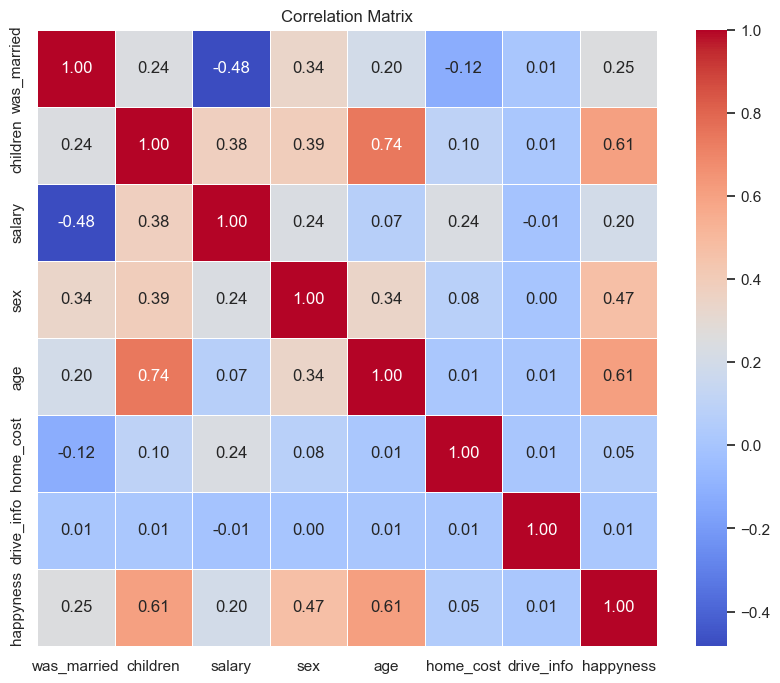

In [11]:
# Импорт библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Построение новой матрицы корреляции
new_correlation_matrix = data.corr()

# Визуализация матрицы корреляции с использованием heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

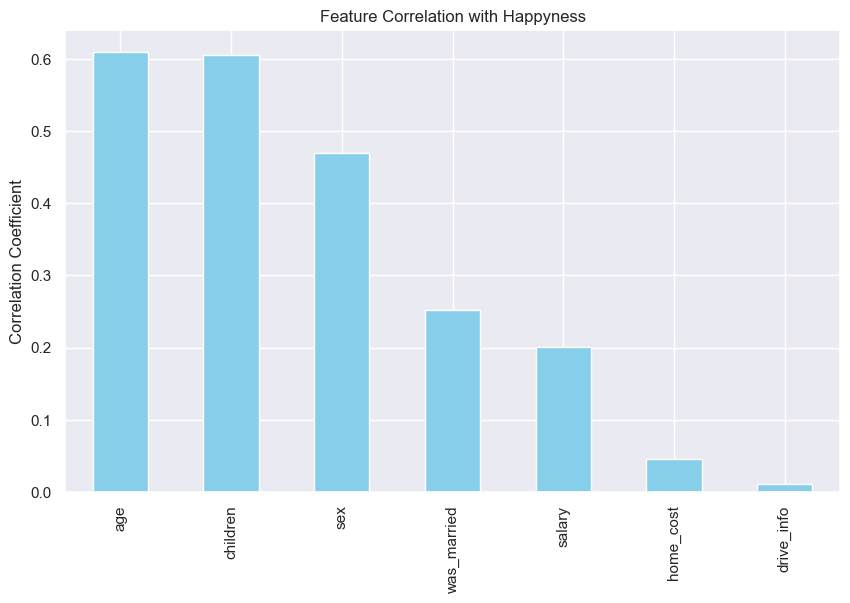

In [12]:
# Сортировка корреляции с 'happyness' по убыванию
sorted_happyness_correlation = new_correlation_matrix['happyness'].sort_values(ascending=False)

# Визуализация корреляции с 'happyness' в виде столбчатой диаграммы
plt.figure(figsize=(10, 6))
sorted_happyness_correlation.drop('happyness').plot(kind='bar', color='skyblue')
plt.title('Feature Correlation with Happyness')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.show()

In [13]:
# Построение матрицы корреляции
correlation_matrix = data.corr()

# Извлечение корреляции каждого признака с 'happyness'
happyness_correlation = correlation_matrix['happyness'].sort_values()

happyness_correlation

C:\Users\Nekon\AppData\Local\Temp\ipykernel_15860\516613512.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


drive_info     0.011119
home_cost      0.045691
salary         0.200837
was_married    0.252313
sex            0.469979
children       0.605813
age            0.609147
happyness      1.000000
Name: happyness, dtype: float64

Итоги.

На наш взгляд, неинформативными являются признаки:
- `drive_info`
- `home_cost`

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалить их (`drop_duplicates`). 
* Есть ли пропуски в данных? Если есть - удалить столбцы, в которых они есть. (`dropna()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

 ### задание 1

In [14]:
# Проверка на дубликаты в данных
duplicates = data.duplicated().sum()

# Удаление дубликатов, если они есть
if duplicates > 0:
    data = data.drop_duplicates()

duplicates

0

### задание 2

In [15]:
# Выше мы уже смотрели в каких столбцах и сколько пропусков у нас имеется, но для наглядности повторим это еще раз
missing_values_df

Столбцы  Пропущено в %
0   drive_info          46.17
1  was_married           0.00
2     children           0.00
3       salary           0.00
4          sex           0.00
5          age           0.00
6   profession           0.00
7    home_cost           0.00
8    happyness           0.00

In [16]:
# Удаление строк с пропущенными значениями в 'drive_info'
data = data.dropna(subset=['drive_info'])

In [17]:
# делаем итоговую проверку, после очистки
missing_values_df = missing_values(data)
missing_values_df

Столбцы  Пропущено в %
0  was_married            0.0
1     children            0.0
2       salary            0.0
3          sex            0.0
4          age            0.0
5   profession            0.0
6    home_cost            0.0
7   drive_info            0.0
8    happyness            0.0

### задание 3

Для определения выбросов по признаку home_cost мы можем использовать метод IQR (межквартильный размах).

Сначала мы найдем первый (Q1) и третий квартили (Q3) для home_cost.
Затем мы вычислим IQR как разность между Q3 и Q1.
Наконец, любые значения home_cost, которые находятся за пределами 
$Q1−1.5×IQR,Q3+1.5×IQR$, будут считаться выбросами.

In [18]:
# Вычисление Q1 и Q3 для 'home_cost'
Q1 = data['home_cost'].quantile(0.25)
Q3 = data['home_cost'].quantile(0.75)

# Вычисление IQR
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Нахождение выбросов
outliers = data[(data['home_cost'] < lower_bound) | (data['home_cost'] > upper_bound)]

# Количество выбросов
num_outliers = outliers.shape[0]

# Удаление выбросов
data_no_outliers = data[~data.index.isin(outliers.index)]


print("Количество выбросов:", num_outliers)
print("Размерность после очистки:", data_no_outliers.shape)

Количество выбросов: 8
Размерность после очистки: (3222, 9)


# Проверка гипотез

Проверьте следующие гипотезы. Для доказательства - используйте визуализацию. (Статистические методы использовать не нужно)

<div class="alert alert-warning">
    
* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

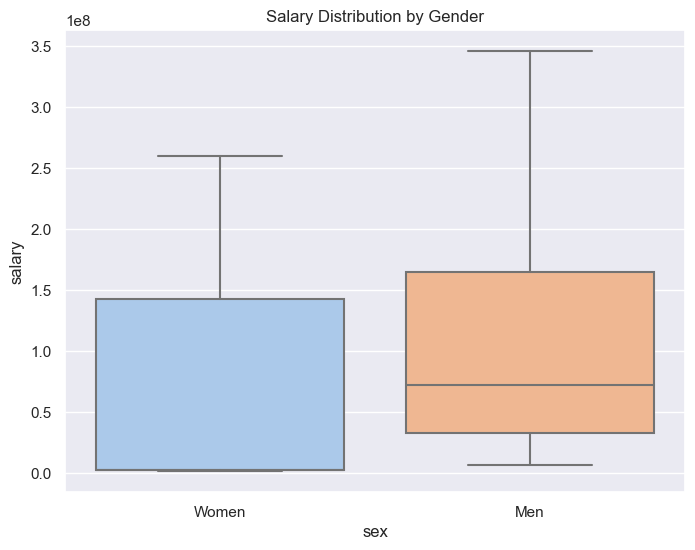

sex
0    5.515288e+07
1    9.863116e+07
Name: salary, dtype: float64

In [19]:
# Визуализация распределения зарплаты для мужчин и женщин с использованием boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_no_outliers, x='sex', y='salary', palette="pastel")
plt.xticks(ticks=[0, 1], labels=['Women', 'Men'])
plt.title('Salary Distribution by Gender')
plt.show()

# Вычисление средней зарплаты для мужчин и женщин
average_salary_by_gender = data_no_outliers.groupby('sex')['salary'].mean()
average_salary_by_gender

На boxplot видно, что мужчины в среднем имеют более высокую зарплату по сравнению с женщинами. Это также подтверждается численными значениями средней зарплаты:

- `Женщины`: ≈55,152,880
- `Мужчины`: ≈98,631,160

Таким образом, гипотеза "женщины в среднем имеют более высокую зарплату, чем мужчины" не подтверждается.

<div class="alert alert-warning">
    
* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

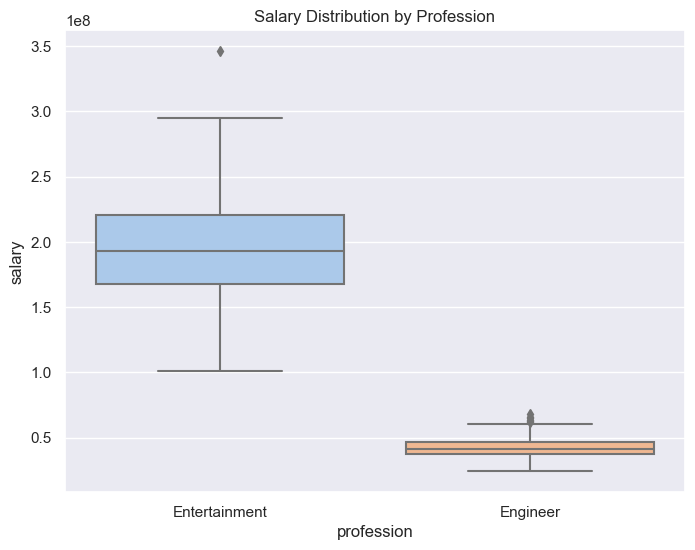

profession
Engineer         4.228631e+07
Entertainment    1.952555e+08
Name: salary, dtype: float64

In [20]:
# Фильтрация данных для инженеров и людей из сферы развлечений
engineer_entertainment_data = data_no_outliers[data_no_outliers['profession'].isin(['Engineer', 'Entertainment'])]

# Визуализация распределения зарплаты для инженеров и людей из сферы развлечений с использованием boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=engineer_entertainment_data, x='profession', y='salary', palette="pastel")
plt.title('Salary Distribution by Profession')
plt.show()

# Вычисление средней зарплаты для инженеров и людей из сферы развлечений
average_salary_by_profession = engineer_entertainment_data.groupby('profession')['salary'].mean()
average_salary_by_profession

На boxplot видно, что люди из сферы развлечений в среднем имеют более высокую зарплату по сравнению с инженерами. Это также подтверждается численными значениями средней зарплаты:

- `Инженеры`: ≈42,286,310
- `Сфера развлечений`: ≈195,255,500

Таким образом, гипотеза "инженеры зарабатывают в среднем больше, чем люди из сферы развлечений" не подтверждается.

<div class="alert alert-warning">
    
* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

C:\Users\Nekon\AppData\Local\Temp\ipykernel_15860\2540288826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['children_group'] = data_no_outliers['children'].apply(lambda x: '> 3 children' if x > 3 else '≤ 3 children')


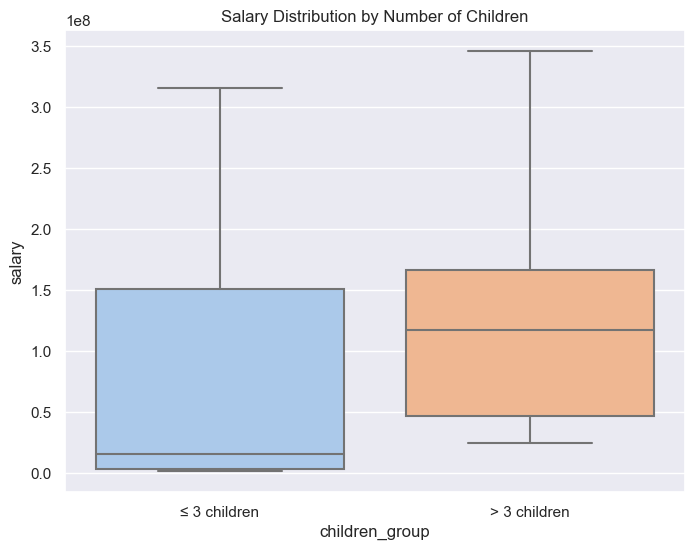

children_group
> 3 children    1.175325e+08
≤ 3 children    6.685040e+07
Name: salary, dtype: float64

In [21]:
# Создание новой переменной для группировки по количеству детей
data_no_outliers['children_group'] = data_no_outliers['children'].apply(lambda x: '> 3 children' if x > 3 else '≤ 3 children')

# Визуализация распределения зарплаты в зависимости от количества детей с использованием boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_no_outliers, x='children_group', y='salary', palette="pastel")
plt.title('Salary Distribution by Number of Children')
plt.show()

# Вычисление средней зарплаты для каждой группы
average_salary_by_children_group = data_no_outliers.groupby('children_group')['salary'].mean()
average_salary_by_children_group

На boxplot видно, что люди, у которых больше трех детей, в среднем имеют более высокую зарплату по сравнению с теми, у кого меньше или трое детей. Это также подтверждается численными значениями средней зарплаты:

- `Больше трех детей`: ≈117,532,500
- `Меньше или трое детей`: ≈66,850,400

Таким образом, гипотеза "те, у кого больше трех детей, зарабатывают в среднем больше, чем те, у кого меньше или трое детей" подтверждается.

<div class="alert alert-warning">
    
* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

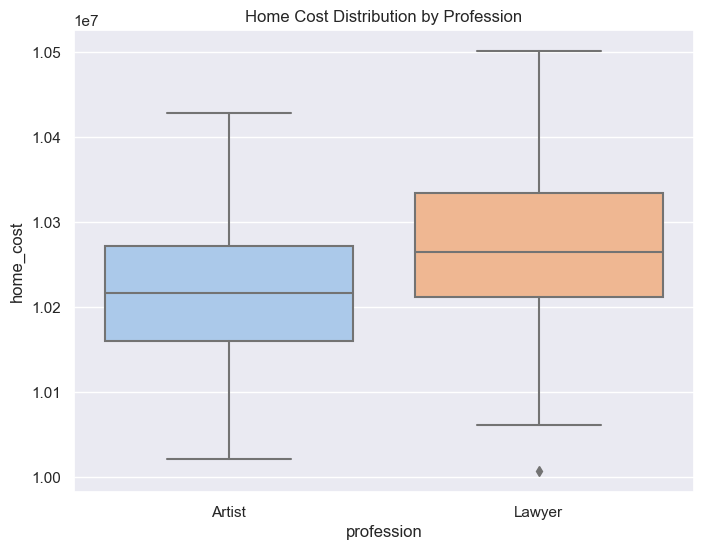

profession
Artist    1.021633e+07
Lawyer    1.027229e+07
Name: home_cost, dtype: float64

In [22]:
# Фильтрация данных для художников и адвокатов
artist_lawyer_data = data_no_outliers[data_no_outliers['profession'].isin(['Artist', 'Lawyer'])]

# Визуализация распределения стоимости домов для художников и адвокатов с использованием boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=artist_lawyer_data, x='profession', y='home_cost', palette="pastel")
plt.title('Home Cost Distribution by Profession')
plt.show()

# Вычисление средней стоимости домов для художников и адвокатов
average_home_cost_by_profession = artist_lawyer_data.groupby('profession')['home_cost'].mean()
average_home_cost_by_profession

На boxplot видно, что стоимость домов для художников и адвокатов в целом сопоставима. Это также подтверждается численными значениями средней стоимости домов:

- `Художники`: ≈10,216,330
- `Адвокаты`: ≈10,272,290

Таким образом, различие в стоимости домов для художников и адвокатов не является существенным, и гипотеза не может быть однозначно подтверждена или опровергнута.

<div class="alert alert-warning">
    
* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


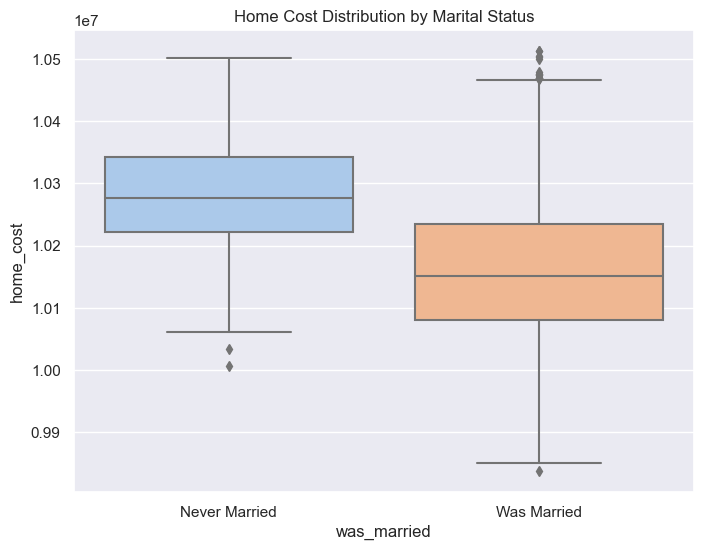

was_married
0    1.027871e+07
1    1.016165e+07
Name: home_cost, dtype: float64

In [23]:
# Визуализация распределения стоимости домов в зависимости от семейного положения с использованием boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_no_outliers, x='was_married', y='home_cost', palette="pastel")
plt.xticks(ticks=[0, 1], labels=['Never Married', 'Was Married'])
plt.title('Home Cost Distribution by Marital Status')
plt.show()

# Вычисление средней стоимости домов в зависимости от семейного положения
average_home_cost_by_marital_status = data_no_outliers.groupby('was_married')['home_cost'].mean()
average_home_cost_by_marital_status

На boxplot видно, что стоимость домов для тех, кто когда-либо был в браке, и тех, кто никогда не был в браке, в целом сопоставима. Это также подтверждается численными значениями средней стоимости домов:

- `Никогда не были в браке`: ≈10,278,710
- `Были в браке`: ≈10,161,650

Таким образом, различие в стоимости домов для этих двух групп не является существенным, и гипотеза "недвижимость у тех, кто когда-либо был в браке, в среднем дороже, чем у тех, кто никогда не был в браке" не подтверждается.

<div class="alert alert-warning">
    
* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - составьте матрицу смежности, она выглядит примерно вот так:


In [24]:
# ******  был в браке | не был в браке |
# мужчины      140    |      499       |
# женщины      241    |      298       |

In [25]:
# Создание матрицы смежности для 'sex' и 'was_married'
contingency_table = pd.crosstab(data_no_outliers['sex'], data_no_outliers['was_married'], margins=True)

# Преобразование индексов и колонок для лучшей читаемости
contingency_table.index = ['Women', 'Men', 'All']
contingency_table.columns = ['Never Married', 'Was Married', 'All']

contingency_table

Never Married  Was Married   All
Women            359          778  1137
Men              144         1941  2085
All              503         2719  3222